In [2]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import color
import numpy as np
import imageio
%matplotlib inline
plt.rcParams.update({'font.size': 15})

### 07-06 Implementation of Problem 7.18

#### (a) Truecolor and Pseudocolor Images:

In [81]:
red = np.asarray(imageio.imread('WashingtonDC-Band3-Red-564.tif'))
green = np.asarray(imageio.imread('WashingtonDC-Band2-Green-564.tif'))
blue = np.asarray(imageio.imread('WashingtonDC-Band1-Blue-564.tif'))
nir = np.asarray(imageio.imread('WashingtonDC-Band4-NearInfrared-564.tif'))

In [82]:
I_rgb = np.dstack((red,green,blue))
I_ngb = np.dstack((nir,green,blue))

Text(0.5, 1.0, 'The pseudocolor composite image')

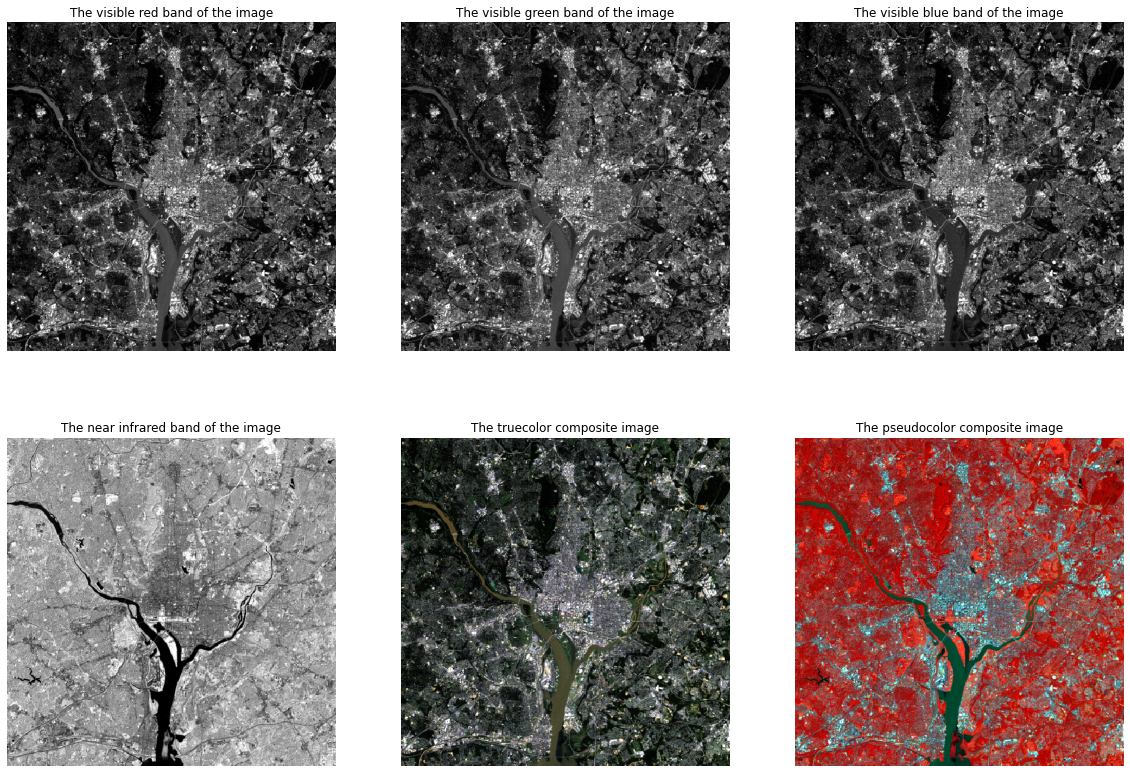

In [64]:
plt.figure(figsize=(20,14))
plt.subplot(2,3,1)
plt.imshow(red,cmap='gray')
plt.axis('off')
plt.title('The visible red band of the image')
plt.subplot(2,3,2)
plt.imshow(green,cmap='gray')
plt.axis('off')
plt.title('The visible green band of the image')
plt.subplot(2,3,3)
plt.imshow(blue,cmap='gray')
plt.axis('off')
plt.title('The visible blue band of the image')
plt.subplot(2,3,4)
plt.imshow(nir,cmap='gray')
plt.axis('off')
plt.title('The near infrared band of the image')
plt.subplot(2,3,5)
plt.imshow(I_rgb)
plt.axis('off')
plt.title('The truecolor composite image')
plt.subplot(2,3,6)
plt.imshow(I_ngb)
plt.axis('off')
plt.title('The pseudocolor composite image')

The image of I_rgb is composed of red, green and blue channels, while the I_ngb is composed of near infrared, green and blue. By differencing just one channel, the appearance of these two color images become difference because of the near infrared channels. This channel is a portion of spectrum which human cannot perceive and it is useful for determing vegetation and plants due to having chlorophyll. Chlorophyll reflects near infrared much more than the other material and that is why the result image looks very reddish. In I_rgb, the water segment is green but its green color is brighter than this segment in I_ngb. In I_ngb, the water segment is black. The man-made structure in I_rgb is gray but in I_ngb is cyan. 

#### (b) Coding Water Bright Blue:

Text(0.5, 1.0, 'The image with water bright blue')

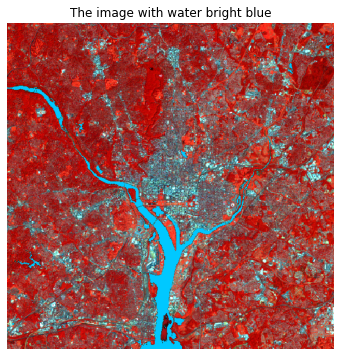

In [6]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8,6))

green1 = np.where(nir <30, 200, green)
blue1 = np.where(nir <30, 255, blue)
nir1 = np.where(nir <30, 0, nir)
I_water = np.dstack((nir1,green1,blue1))

plt.imshow(I_water)
plt.axis('off')
plt.title('The image with water bright blue')

In near infrared band, the water segmentation is completely black. Thus, this area can be chosen by considering the threshold near zero intensity. All the intensities less than this threshold are allocated to the water segmentation. By changing the value of these pixels in three different channels of I_ngb, this part is changed to light blue.

#### (c) Coding Man-Made Structures Bright Yellow:

Text(0.5, 1.0, 'The image with man-made structures bright yellow:')

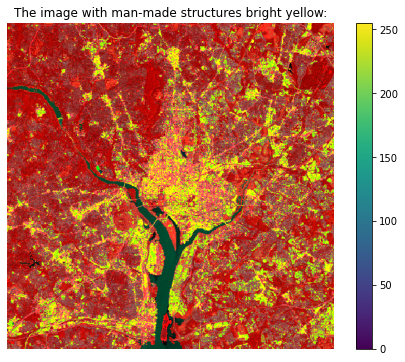

In [76]:
plt.figure(figsize=(8,6))
green_n = np.where(green>120,255,green)
blue_n = np.where(green>120,0,blue)
nir_n = np.where((nir<120)&(nir>30),255,nir)
I_manmade = np.dstack((nir_n,green_n,blue_n))
plt.imshow(I_manmade)
plt.colorbar()
plt.axis('off')
plt.title('The image with man-made structures bright yellow')

In green and blue bands, the man-made structures have gray color. In near infrared band, this segmentation has gray values. Thus, by setting the threshold, we can choose all the intesnities realted to this segmentation in thses tow channel. In near infrared band, the man-made structures are gray but they are brighter than the water segmentation (black) and darker than the vegetation. Thus, by setting the threshold, this segmentation can be chosen. This method is based on the bounding box in figure 7.41(c) of textbook.

#### (d) Coding Water and Man-Made Structures: 

Text(0.5, 1.0, 'The image with man-made structures bright yellow and water bright blue')

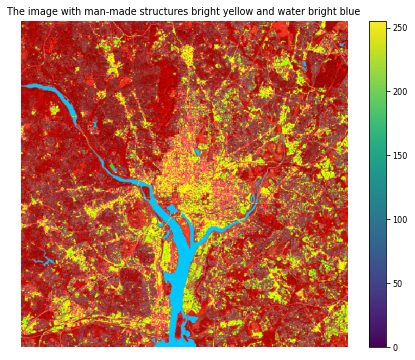

In [83]:
plt.figure(figsize=(8,6))

w = np.where(nir<30)
mg = np.where(green>120)
mn = np.where((nir<120)&(nir>30))
green[w] = 200
green[mg] = 255
blue[w] = 255
blue[mg] = 0
nir[w] = 0
nir[mn] = 255

plt.rcParams.update({'font.size': 8})
I_718 = np.dstack((nir,green,blue))
plt.imshow(I_718)
plt.colorbar()
plt.axis('off')
plt.title('The image with man-made structures bright yellow and water bright blue')

In this image the segmentation of water is determined with bright blue and the man_made structures are determined with yellow. Each of these sectioned are determeined by setting the specific range in each channel. 

### 07-03 Color Image Enhancement by Histogram Processing

In [33]:
I_rgb = np.asarray(imageio.imread('dark_stream.tif'))
R = I_rgb[:,:,0]
G = I_rgb[:,:,1]
B = I_rgb[:,:,2]
R_histeq = exposure.equalize_hist(R)
G_histeq = exposure.equalize_hist(G)
B_histeq = exposure.equalize_hist(B)

Text(0.5, 1.0, 'The high contrast image with the histogram equalization of RGB image')

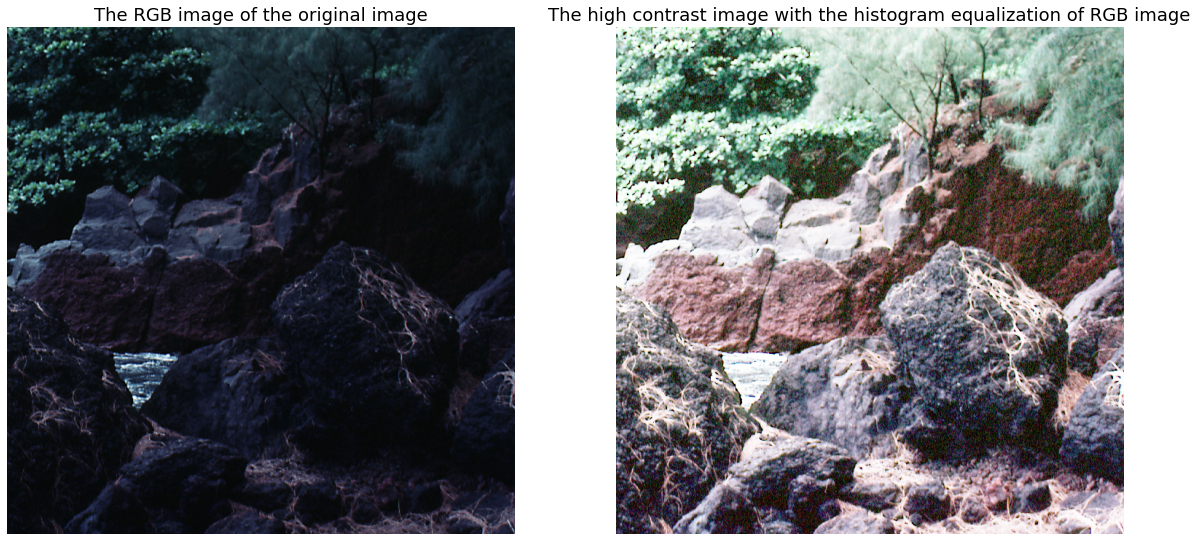

In [57]:
plt.figure(figsize=(20,14))
plt.subplot(1,2,1)
plt.imshow(I_rgb)
plt.axis('off')
plt.title('The RGB image of the original image')
plt.subplot(1,2,2)
I_rgb_histeq = np.dstack((R_histeq,G_histeq,B_histeq))
plt.imshow(I_rgb_histeq)
plt.axis('off')
plt.title('The high contrast image with the histogram equalization of RGB image')

Here, the three channels of the RGB image are seperated and historam equalization method is applied on each of these channels. Based on the original image which is so dark, the histogram of each of the RGB image channels is accumulated in the lower end of the histogram plot. Thus, the histogram equlization method ia applied to disturbute intenisities of each channel in the whole range of the image intensities [0,1]. Thus, the combination of these channels make the RGB image to have the high contrast.

#### (b) HSV Histogram Equalization I:

Text(0.5, 1.0, 'The HSV image with V channel histogram equalization')

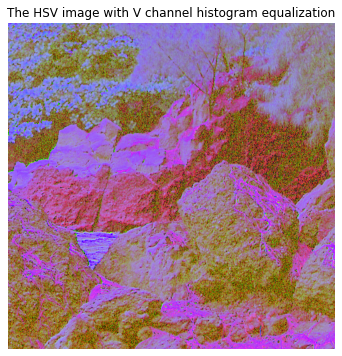

In [37]:
I_hsv = color.rgb2hsv(I_rgb)
H = I_hsv[:,:,0]
S = I_hsv[:,:,1]
V = I_hsv[:,:,2]
V_histeq = exposure.equalize_hist(V)
I_hsv_vhisteq = np.dstack((H,S,V_histeq))
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8,6))
plt.imshow(I_hsv_vhisteq)
plt.axis('off')
plt.title('The HSV image with V channel histogram equalization')

This image is the combination of H, S and histogram equalization of V channels. Here, instead of using V channel in HSV image, the histgram equalization of V channels is used. The value of HSV image represents the intensity of the colour chosen. The HSV model describes colors similarly to how the human eye tends to perceive color. In HSV, V channel is the brightness of the color and varies with color saturation. It ranges from 0 to 100%. When the value is '0′ the color space will be totally black. With the increase in the value, the color space brightness up and shows various colors. Applying the histogram equalization causes the value of V channel are distributed in the whole range of image between 0 to 1 and the values are not the max value of R,G,B channels anymore so the brightness of the colors become modified, thus the appearance is different.

#### (c) HSV Histogram Equalization II and III:

Text(0.5, 1.0, 'The RGB image of HSV image with histequ of H,S and V channels')

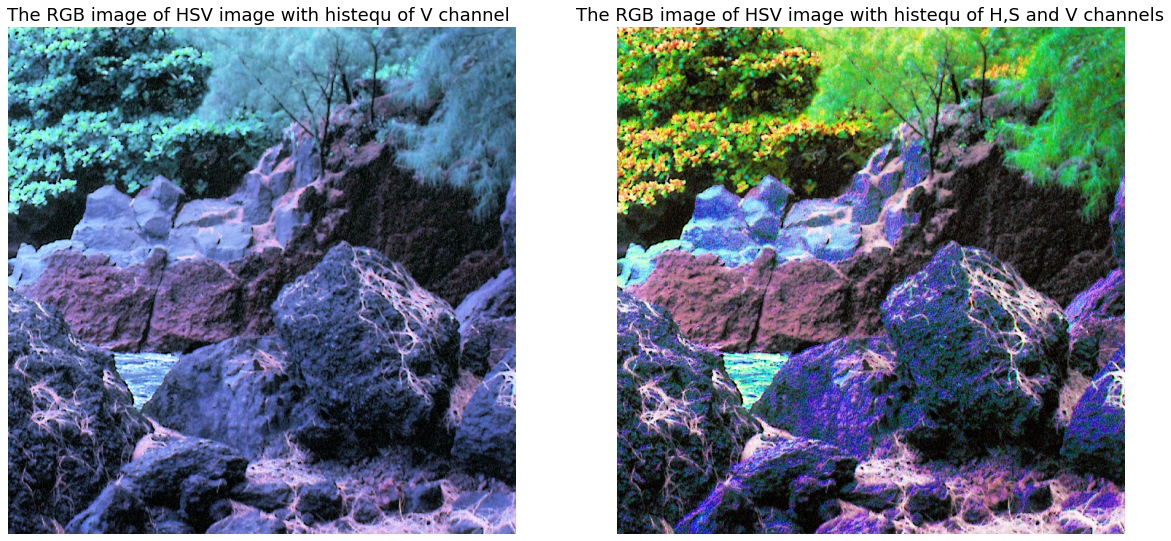

In [41]:
I_hsv_vhisteq_rgb=color.hsv2rgb(I_hsv_vhisteq)
H_histeq = exposure.equalize_hist(H)
S_histeq = exposure.equalize_hist(S)
I_hsv_allhisteq = np.dstack((H_histeq,S_histeq,V_histeq))
I_hsv_allhisteq_rgb=color.hsv2rgb(I_hsv_allhisteq)
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.imshow(I_hsv_vhisteq_rgb)
plt.axis('off')
plt.title('The RGB image of HSV image with histequ of V channel ')
plt.subplot(1,2,2)
plt.imshow(I_hsv_allhisteq_rgb)
plt.axis('off')
plt.title('The RGB image of HSV image with histequ of H,S and V channels')

I_rgb image is dark but I_hsv_vhisteq_rgb is bright, the colors are so brighter than I_rgb and the details are distinguishable. I_hsv_allhidteq_rgb is brighter than I_rgb or even I_hsv_vhisteq_rgb. In this image, more details appear and more colors become visible. For example, I_rgb  and I_hsv_vhisteq_rgb show that in the green part there are just trees and bushes but  I_hsv_allhidteq_rgb shows more details by appearing in yellow and orange colors. it illustrates that there are flowers in this part.

#### (d) Discussion:

I_rgb_histeq is obtained by applying the histogram equalization on all the red, green and blue channels of RGB image. It means that the intensities of all these channels are disturbuted in the whole range of image intenisty. Thus, it causes the image has a high contrast with bright color. Due to the correlation between the color channels, the chromaticity of colors is modified. In I_hsv_vhisteq, the RGB image is mapped to HSV space color and the histgram equalization is applied on the channel V, so the brightness of this image is modified to see all the colors in images brighter than the original images. Then, this image is mpped from HSV space to RGB color space, I_hsv_vhisteq_rgb. This image has more brighter colors because their brightness is modified. By applying the histogram equalization on all channels of the HSV and converting to RGB color space (I_hsv_allhisteq_rgb), the saturation, hue and value of colors are modified by this method. Thus, all the colors and the datails of image become visible. As it is shown, I_hsv_allhisteq_rgb shows some details that are not visible in all other equalized images. All of these equalized images are brighter than the I_rgb but each of them provide the different level of color modification. Thus, applying histogram equalization on which color spcace and the image channel is important for modifying the color of images and each of them provide the different result.

### 07-07 Color Image Segmentation

#### (a) Segmentation Using Cube in RGB Space:

In [163]:
I_s = np.asarray(imageio.imread('strawberries-RGB.tif'))

In [164]:
def rectangle_color_slicing (I,a,w):
    R = I[:,:,0]
    G = I[:,:,1]
    B = I[:,:,2]  
    Rn = np.where((abs(R-a[0])>(w/2)) | (abs(G-a[1])>(w/2)) | (abs(B-a[2])>(w/2)), 0.5, R)
    Gn = np.where((abs(R-a[0])>(w/2)) | (abs(G-a[1])>(w/2)) | (abs(B-a[2])>(w/2)), 0.5, G)
    Bn = np.where((abs(R-a[0])>(w/2)) | (abs(G-a[1])>(w/2)) | (abs(B-a[2])>(w/2)), 0.5, B)
    S = np.dstack((Rn,Gn,Bn))
    return S

Text(0.5, 1.0, 'Color Segmentation Using Cube in RGB Space')

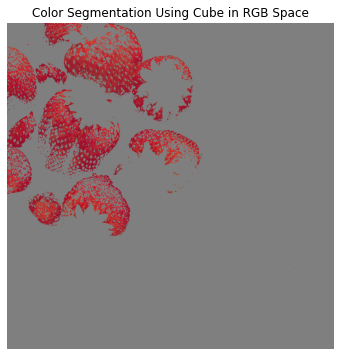

In [165]:
a = [0.6863,0.1608,0.1922]
w = 0.2549
I = I_s/255
S = rectangle_color_slicing (I,a,w)
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8,6))
plt.imshow(S)
plt.axis('off')
plt.title('Color Segmentation Using Cube in RGB Space')

The formula of segmentation uses a cube in RGB space in a way that the image should be split into R, G, and B channels. Pixels are selected in the Red channel so that the distance of their intensities from the value of chosen center in this channel (a[0]) is more than the half of chosen width. This process is also done in two other channels for the value of the center (a[1], a[2]) in these channels. Then, the intensities of the union of these pixels (logic OR function) are changed to 0.5 in all three channels. The intensities of the rest of pixels are not changed. Thus, this process causes, the regions related to the specific object with a specific color to be chosen and remain intact but the rest of the image is changed to gray.

#### (b) Segmentation Using Sphere in RGB Space

In [166]:
def sphere_color_slicing (I,a,r):
    R = I[:,:,0]
    G = I[:,:,1]
    B = I[:,:,2]
    Rn = np.where(((R-a[0])**2+(G-a[1])**2+(B-a[2])**2)>(r**2), 0.5, R)
    Gn = np.where(((R-a[0])**2+(G-a[1])**2+(B-a[2])**2)>(r**2), 0.5, G)
    Bn = np.where(((R-a[0])**2+(G-a[1])**2+(B-a[2])**2)>(r**2), 0.5, B)
    S = np.dstack((Rn,Gn,Bn))
    return S, Rn, Gn, Bn

Text(0.5, 1.0, 'Color Segmentation Using Sphere in RGB Space')

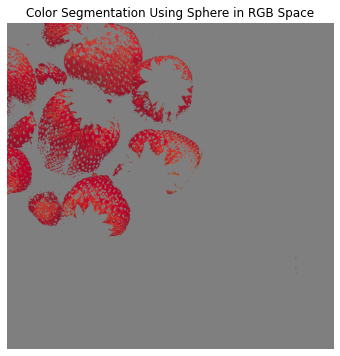

In [167]:
a = [0.6863,0.1608,0.1922]
r = 0.1765
I = I_s/255
S, Rn, Gn, Bn = sphere_color_slicing (I,a,R)
plt.figure(figsize=(8,6))
plt.imshow(S)
plt.axis('off')
plt.title('Color Segmentation Using Sphere in RGB Space')

Color slicing with using sphere in RGB space in a way that the pixels being in the specific range should have an intensity value of 0.5 in each channel and the rest of pixels remain unchanged. This specific range is the range that the summation of power 2 of distances of intensities in each channel from the value of the center in that channel should be higher than power 2 of a chosen radius. The result image has the better seperating the specific objects from their surrounding. As it is shown, this method performes better than the previous method.